                                                 **A** **Convolutional** **Neural** **Network**

A Convolutional Network is a type of Neural Network that is used to classify the spatial data, for exampple the images,sequenes etc.

In an image, each pixel is somehow related to some other pictures.  

Looking at a singel pixel, we cannot guess the whole image. We have to look at the complete imahe to identify the image. CNN does exactly that.

Using a kernel or feature detects, it detects the feature of the image. A combination of the image then forms the cmplete image which can be classified using a densely connected neural network.

                                       **Image** **Classification** **with**   **CNN**

here we will perform the image classification with the CNN. We first need to see that how the computers see images.

When a human sees images, he or she sees the squares, circles, triangles and different dhapes. But this doesn't happen for the computers as they see the shpaes in the form of numbers.  For a Computer, an image is no more than a 2D set of pixels arranged in a certain manner.

For greyscale images, the pixel value can be between the 0-255, while for color images there are three channels: red, green and blue. Each pixel is between the 0-255.

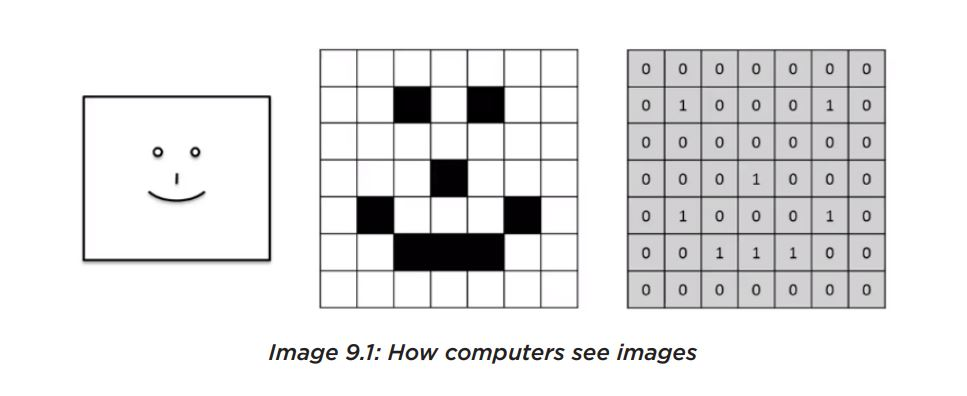

Here in the above image we can see that the box on the leftmost is what humans see whereas the 1 indicates a black pixel. In the real world, 1 indicates a black pixel.  In the real world, 1 indicates the white pixel while 0 indicates a black pixel.

Now we know how a computer sees images. The next step is to know the steps involved in image classification with CNN.

The following are the steps involved in image classification with CNN as:
1. The Convolutional Operation
2. The Relu Operation
3. The Pooling Operation
4. Flattening and fully Connected Layer

The Convolutionl Operation:
The convolutional operation is the first step involved in the image classification.

In a convolutional operation,you have an image and a feature detector. The values of the feature detector are initialized randomly.

The feature detector is moved over the image from left to right. The values in the feature detectoe is initialized. The feature detector is moved over the image from left to right. The values from the feature vector are multiplied and by the corresponding values, in the image, the feature values, all the feature values are added.

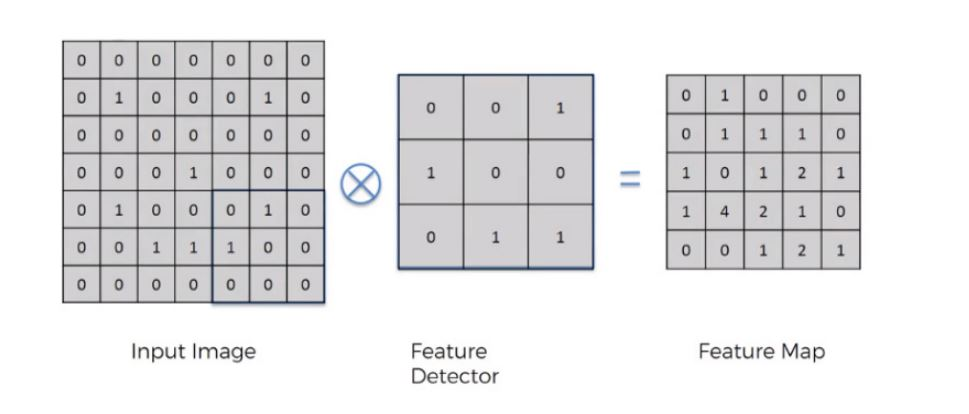

In the above image, we have an input image of 7x7. The feature detector is of the suze 3x3. The feature detector is placed over the the image at the top left of the input image  and then the pixel values are detected and multiplied by the pixel values in the input image.

The result is then added and the feature detectr then moves to the n step towards the right. Here, N refers to the stride. A stride is basically the number of steps that a feature detector takes from the left to right and from top to bottom to find a new value for the feature map.

The following are the steps involved in image classification
with CNN:
1. The Convolution Operation
2. The ReLu Operation
3. The Pooling Operation
4. Flattening and Fully Connected Layer.

The Convolutional operation :
The convolution operation is the first step involved in the
image classification with a convolutional neural network.  



The feature detector is
placed over the image at the top left of the input image, and
then the pixel values in the feature detector are multiplied by
the pixel values in the input image. The result is then added.
The feature detector then moves to N step towards the right.
Here, N refers to stride. A stride is basically the number of
steps that a feature detector takes from left to right and then
from top to bottom to find a new value for the feature map.

In a ReLu operation, you simply apply the ReLu activation
function on the feature map generated as a result of the
convolution operation. A convolution operation gives us linear
values. The ReLu operation is performed to introduce nonlinearity in the image.
In the ReLu operation, all the negative values in a feature map
are replaced by 0. All the positive values are left untouched.

Pooling operation:
A pooling operation is performed in order to introduce spatial
invariance in the feature map. Pooling operation is performed
after convolution and ReLu operation.

In [ ]:
# implementing CNN with tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from keras.models import Model

In [ ]:
# importing the mnist data
mnist_data = keras.datasets.fashion_mnist
mnist_data

<module 'keras.datasets.fashion_mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
# dividing the data into the train and test sets
(training_images, training_labels), (test_images, test_labels) = mnist_data.load_data()

The images in our datset are greyscale images where each pixel lies between 0 and 255.  The following script normalizes the pixel values between the 0 and 1.

In [ ]:
# scaling the images
training_images, test_images = training_images/255.0, test_images/255.0


In [ ]:
print(training_images.shape)

(60000, 28, 28)


The above output shows that our training dataset contains the 60,000 records. Eacch image is 28 pixels wide and 28 pixels high.

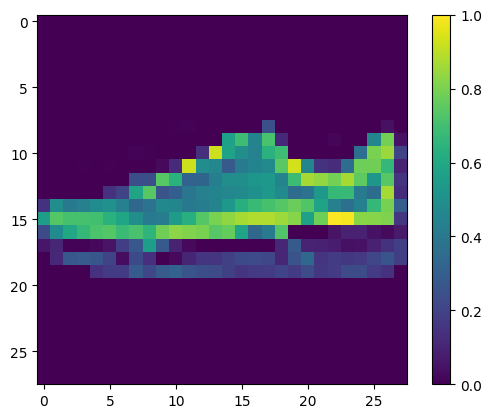

In [ ]:
# printing the image number 9 fromthe test set

plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

The output shows that 9th image  in our test set is the image of a sneaker

The next step is to change the dimensions of our input mages. CNN in keras expects the dat to be in the format of the Width-Height_Channels. Our images contian the width and the height but no channels.  

Since the images are of the greyscale, wwe set the image to 1

In [ ]:
# converting the data into the right shape
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)

(60000, 28, 28, 1)


In [ ]:
# printing the nmber of output classes
output_classes = len(set(training_labels))
print("Number of the input classes is: ", output_classes)

Number of the input classes is:  10


In [ ]:
training_images[0].shape

(28, 28)

In [46]:
input_layer = Input(shape=training_images[0].shape)

conv1 = Conv2D(32, (3,3),strides = 2, activation='relu')(input_layer)
maxpool1 = MaxPool2D((2,2))(conv1)

conv2 = Conv2D(64, (3,3), strides=2, activation='relu')(maxpool1)

flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)

dense1 = Dense(512, activation='relu')(drop1)
drop2 = Dropout(0.2)(dense1)

output_layer = Dense(output_classes, activation='softmax')(drop2)

model = Model(input_layer,output_layer)
model

<Functional name=functional_1, built=True>

In [48]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])
model

<Functional name=functional_1, built=True>

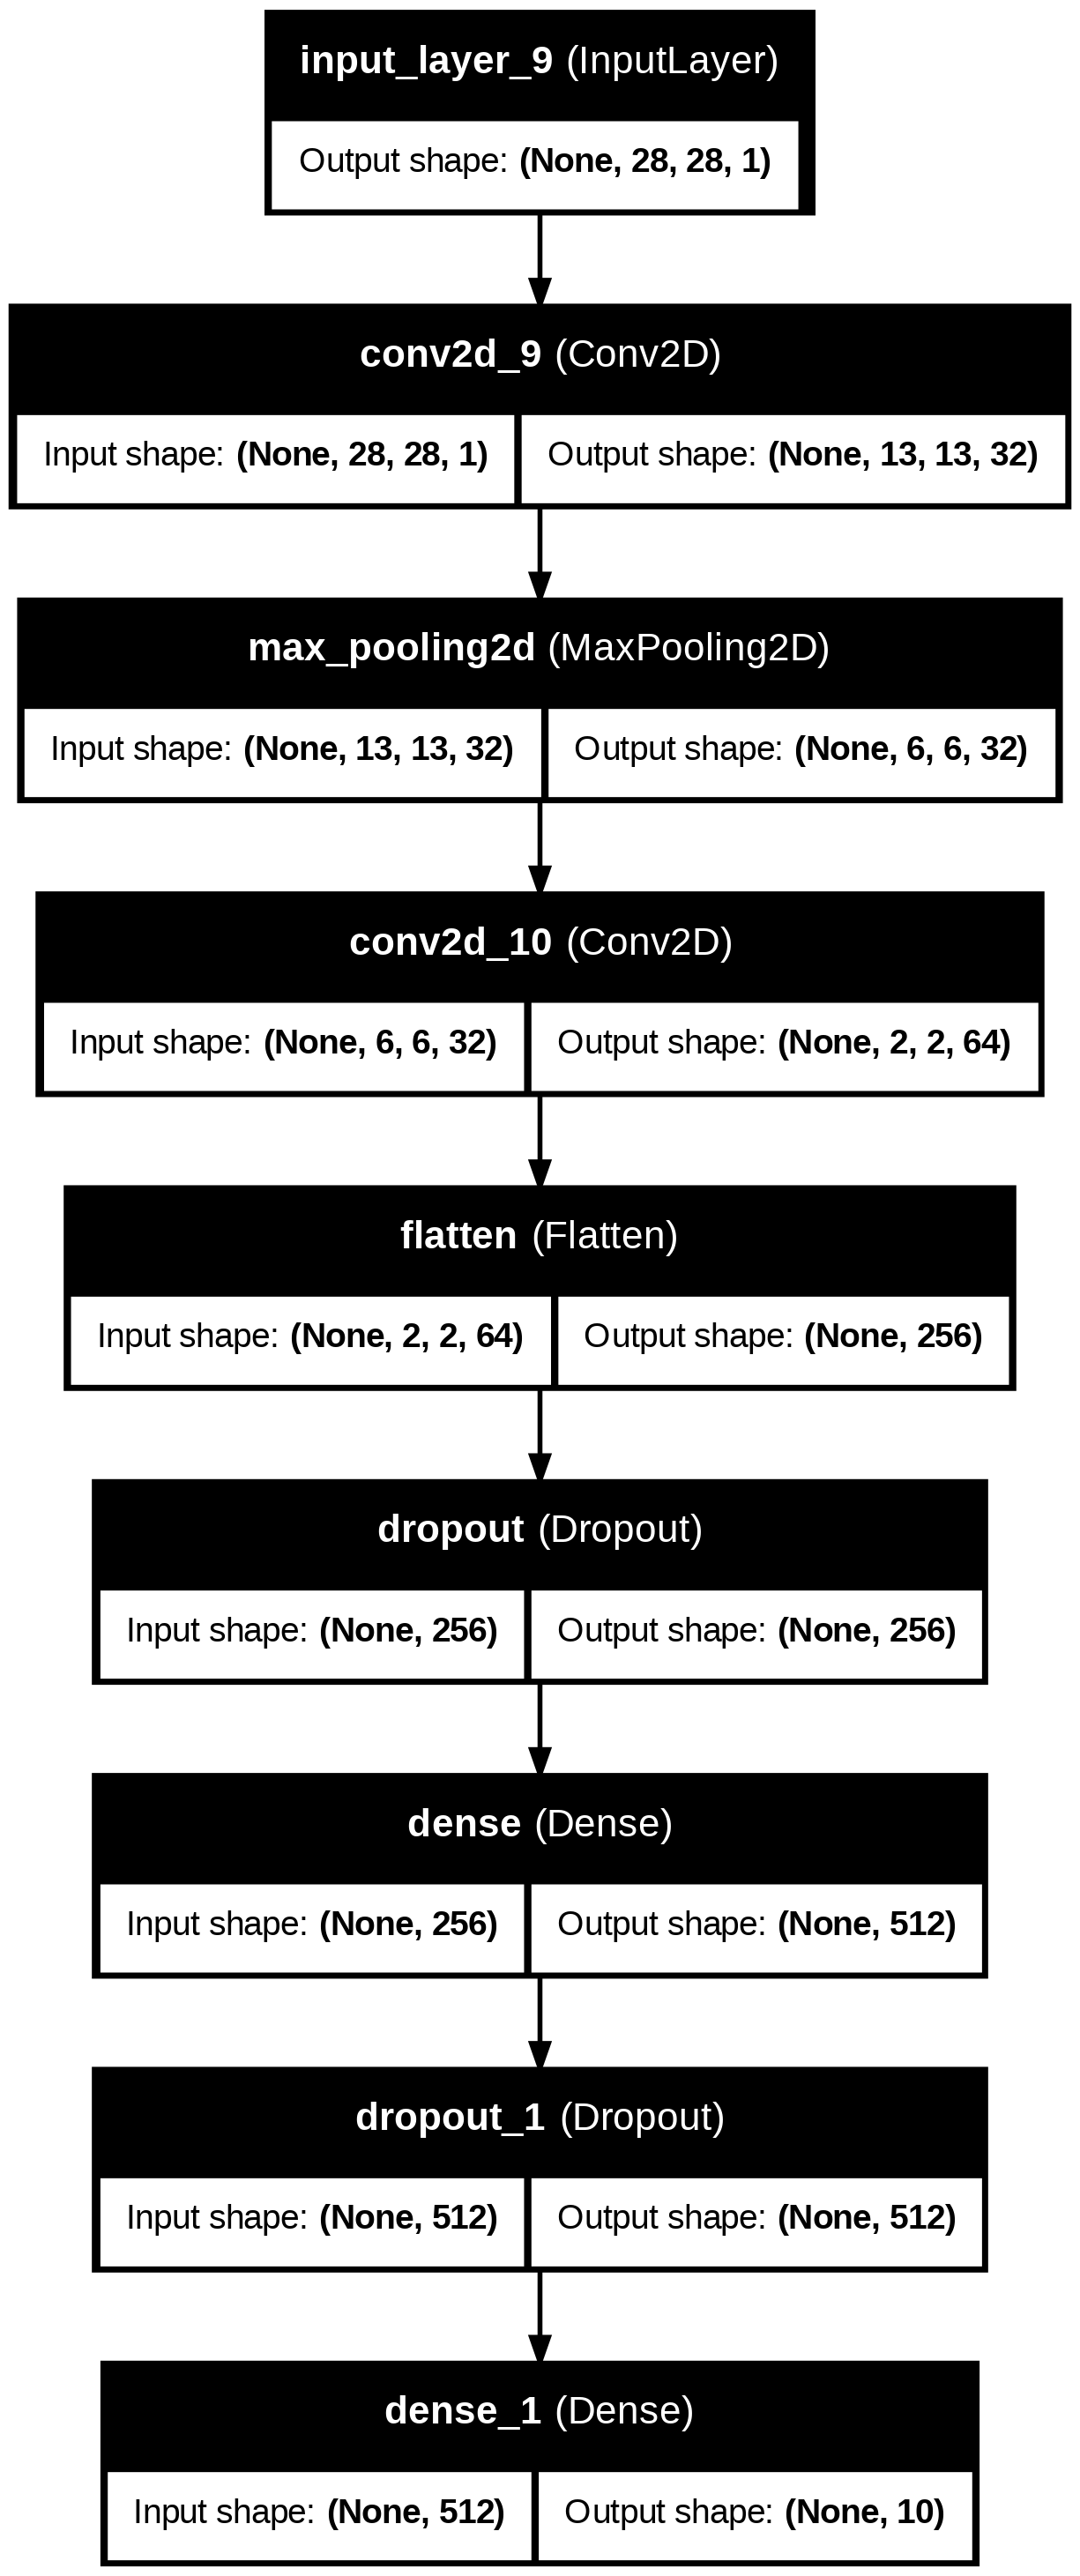

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
# training the CNN model
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7118 - loss: 0.7921 - val_accuracy: 0.8355 - val_loss: 0.4511
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8384 - loss: 0.4383 - val_accuracy: 0.8538 - val_loss: 0.3934
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8551 - loss: 0.3870 - val_accuracy: 0.8570 - val_loss: 0.3846
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8676 - loss: 0.3556 - val_accuracy: 0.8700 - val_loss: 0.3576
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8732 - loss: 0.3424 - val_accuracy: 0.8678 - val_loss: 0.3505
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8780 - loss: 0.3253 - val_accuracy: 0.8779 - val_loss: 0.3348
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8861 - loss: 0.3068 - val_accuracy: 0.8773 - val_loss: 0.3375
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8878 -

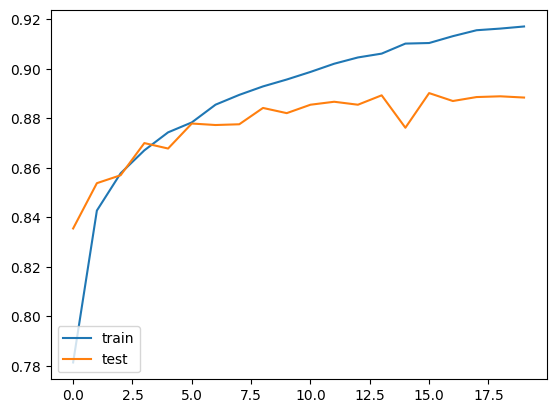

In [ ]:
# plotting the accuracy table
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')

plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')

It shows that the training accuracy is higher and and test_accuracy starts to flatten after 88 percent


In [ ]:
# making the predictions on a single image
output = model.predict(test_images)
prediction = np.argmax(output[9])
print(prediction)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
7


The output shows number 7. The output will always be a number
since deep learning algorithms work only with numbers. The
numbers correspond to the following labels:
0: T-shirt\top
1: Trousers
2: Pullover
3: Dress
4: Coat
5: Sandals
6: Shirt
7: Sneakers
8: Bag
9: Ankle boot
The above list shows that the number 7 corresponds to
sneakers. Hence, the prediction by our CNN is correct.
